# Pairwise analysis of Movie Genres

For the top 1000 movies,I did  some pairwise analysis for genre distributions. The main purpose is to see which genres occur together in the same movie.

In [5]:
#who

from sklearn.feature_extraction.text import CountVectorizer

# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

# for handle stringified JSON columns
import json
import ast


# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# to split the datasets
from sklearn.model_selection import train_test_split

# load dataset
df = pd.read_csv("movies_complete.csv", parse_dates=["release_date"])

# rows and columns of the data
print('Dataframe original shape: ', df.shape)

# visualise the dataset
df.head()

Dataframe original shape:  (44691, 28)


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast_size,cast_names,crew_size,director,actor_1_name,actor_2_name,actor_3_name,actor_1_gender_str,actor_2_gender_str,actor_3_gender_str
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//rhIR...,13,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,106,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Male,Male,Male
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vzmL...,26,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,16,Joe Johnston,Robin Williams,Jonathan Hyde,Kirsten Dunst,Male,Male,Female
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//6ksm...,7,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,4,Howard Deutch,Walter Matthau,Jack Lemmon,Ann-Margret,Male,Male,Female
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//16XO...,10,Whitney Houston|Angela Bassett|Loretta Devine|...,10,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,Female,Female,Female
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,nan,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//e64s...,12,Steve Martin|Diane Keaton|Martin Short|Kimberl...,7,Charles Shyer,Steve Martin,Diane Keaton,Martin Short,Male,Female,Male


# Feature Engineering

In [6]:
df.genres.head()

0     Animation|Comedy|Family
1    Adventure|Fantasy|Family
2              Romance|Comedy
3        Comedy|Drama|Romance
4                      Comedy
Name: genres, dtype: object

In [7]:
genres = df['genres']
genres = genres.str.replace('|',' ')
genres = genres.replace(np.nan, 'None')
genres.head(5)

0     Animation Comedy Family
1    Adventure Fantasy Family
2              Romance Comedy
3        Comedy Drama Romance
4                      Comedy
Name: genres, dtype: object

In [8]:
vectorizer = CountVectorizer()

X= vectorizer.fit_transform(genres)
print(X.shape)

(44691, 23)


In [9]:
matrix = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
matrix1000=matrix.head(1000)
matrix1000

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,none,romance,science,thriller,tv,war,western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
matrix1000.action.value_counts()

0    830
1    170
Name: action, dtype: int64

In [11]:
print(vectorizer.get_feature_names())

['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign', 'history', 'horror', 'movie', 'music', 'mystery', 'none', 'romance', 'science', 'thriller', 'tv', 'war', 'western']


In [94]:
coocc = matrix1000.T.dot(matrix1000)

#### 23X23 matrix and we see that we had 23 Genres. The matrix counts the number of simultaneous occurrences of genres in same movie.

In [13]:
coocc.shape

(23, 23)

In [14]:
coocc

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,none,romance,science,thriller,tv,war,western
action,170,60,1,34,48,0,70,17,10,27,1,5,2,0,1,12,0,10,27,91,0,3,14
adventure,60,113,11,24,14,1,38,44,16,18,0,2,0,0,2,4,0,14,18,27,0,3,9
animation,1,11,36,9,0,0,7,31,13,5,0,0,0,0,4,0,0,5,5,0,0,0,0
comedy,34,24,9,379,31,0,163,77,35,11,6,3,9,2,15,11,0,128,11,22,2,5,6
crime,48,14,0,31,129,0,76,2,3,5,0,1,3,0,3,18,0,14,5,70,0,0,0
documentary,0,1,0,0,0,21,2,1,0,0,3,2,0,0,1,0,0,0,0,0,0,0,0
drama,70,38,7,163,76,2,571,55,27,16,8,26,13,1,13,48,0,178,16,118,1,25,13
family,17,44,31,77,2,1,55,137,43,9,0,1,0,1,8,0,0,18,9,0,1,0,1
fantasy,10,16,13,35,3,0,27,43,81,18,0,0,6,0,3,4,0,13,18,9,0,0,1
fiction,27,18,5,11,5,0,16,9,18,64,0,0,10,0,0,6,0,3,64,26,0,0,0


## Show Heatmap of Genres

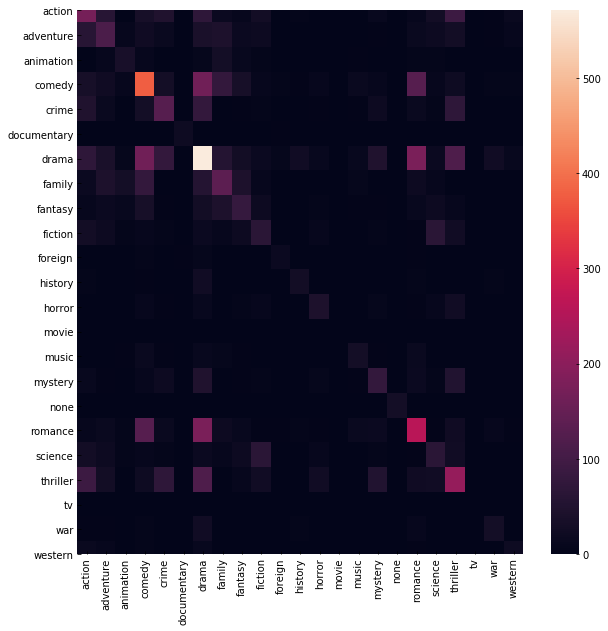

In [16]:
import seaborn as sns
# plot heat map of co-occuance matrix
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(coocc)

## Self pairs - Diagonal
The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred. i,e there were 170 out of the 1000 movies that the had a genre or action. 

## EDA - Total Number of movies in eache Genre

In [99]:
diagonal = pd.Series(np.diag(coocc), index=[coocc.index, coocc.columns])
diagonal.sort_values(ascending=False)

drama        drama          571
comedy       comedy         379
romance      romance        259
thriller     thriller       213
action       action         170
family       family         137
crime        crime          129
adventure    adventure      113
fantasy      fantasy         81
mystery      mystery         76
science      science         64
fiction      fiction         64
horror       horror          44
animation    animation       36
music        music           31
none         none            30
war          war             30
history      history         28
documentary  documentary     21
western      western         21
foreign      foreign         17
movie        movie            2
tv           tv               2
dtype: int64

#### 1000 movies had a total of 2518 genres associated with them

In [100]:
diagonal.sum()

2518

## After analyzing self pairs, I remove them to get a better sense of the genres cocurrences

In [17]:
import numpy as np
np.fill_diagonal(coocc.values, 0)

In [18]:
coocc

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,none,romance,science,thriller,tv,war,western
action,0,60,1,34,48,0,70,17,10,27,1,5,2,0,1,12,0,10,27,91,0,3,14
adventure,60,0,11,24,14,1,38,44,16,18,0,2,0,0,2,4,0,14,18,27,0,3,9
animation,1,11,0,9,0,0,7,31,13,5,0,0,0,0,4,0,0,5,5,0,0,0,0
comedy,34,24,9,0,31,0,163,77,35,11,6,3,9,2,15,11,0,128,11,22,2,5,6
crime,48,14,0,31,0,0,76,2,3,5,0,1,3,0,3,18,0,14,5,70,0,0,0
documentary,0,1,0,0,0,0,2,1,0,0,3,2,0,0,1,0,0,0,0,0,0,0,0
drama,70,38,7,163,76,2,0,55,27,16,8,26,13,1,13,48,0,178,16,118,1,25,13
family,17,44,31,77,2,1,55,0,43,9,0,1,0,1,8,0,0,18,9,0,1,0,1
fantasy,10,16,13,35,3,0,27,43,0,18,0,0,6,0,3,4,0,13,18,9,0,0,1
fiction,27,18,5,11,5,0,16,9,18,0,0,0,10,0,0,6,0,3,64,26,0,0,0


In [22]:
coocc_stack

action       action           0
             adventure       60
             animation        1
             comedy          34
             crime           48
             documentary      0
             drama           70
             family          17
             fantasy         10
             fiction         27
             foreign          1
             history          5
             horror           2
             movie            0
             music            1
             mystery         12
             none             0
             romance         10
             science         27
             thriller        91
             tv               0
             war              3
             western         14
adventure    action          60
             adventure        0
             animation       11
             comedy          24
             crime           14
             documentary      1
             drama           38
             family          44
        

In [20]:
type(coocc_stack)

pandas.core.series.Series

In [60]:
coocc_stack_1 = coocc.stack().reset_index(level = 1) 
coocc_stack_1.head(10)

,level_1,0
action,action,0
action,adventure,60
action,animation,1
action,comedy,34
action,crime,48
action,documentary,0
action,drama,70
action,family,17
action,fantasy,10
action,fiction,27


In [61]:
type(coocc_stack_1)

pandas.core.frame.DataFrame

In [25]:
coocc_stack_1.columns

Index(['level_1', 0], dtype='object')

In [28]:
coocc_stack_1.index

Index(['action', 'action', 'action', 'action', 'action', 'action', 'action',
       'action', 'action', 'action',
       ...
       'western', 'western', 'western', 'western', 'western', 'western',
       'western', 'western', 'western', 'western'],
      dtype='object', length=529)

In [37]:
coocc_stack_1.sort_values(by=[0], ascending=False).head(10)

,level_1,0
drama,romance,178
romance,drama,178
comedy,drama,163
drama,comedy,163
comedy,romance,128
romance,comedy,128
drama,thriller,118
thriller,drama,118
thriller,action,91
action,thriller,91


#### As seen above, because the cooccurence matrix is symmetrical,  There is essentially duplicate data where the dataframe shows the cooccurance of romance and drama genres is 178 twice. To fix this, I will make the oeiganal 'coocc'  matrix with the diagonal filled with 0's  a upper  triangle matrix

In [40]:
print(np.triu(np.ones(coocc.shape)).astype(np.bool))

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True]

In [50]:
coocc_2 = coocc.where(np.triu(np.ones(coocc.shape)).astype(np.bool))
coocc_2

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,fiction,foreign,history,horror,movie,music,mystery,none,romance,science,thriller,tv,war,western
action,0.00,60.00,1.00,34.00,48.00,0.00,70.00,17.00,10.00,27.00,1.00,5.00,2.00,0.00,1.00,12.00,0.00,10.00,27.00,91.00,0.00,3.00,14
adventure,nan,0.00,11.00,24.00,14.00,1.00,38.00,44.00,16.00,18.00,0.00,2.00,0.00,0.00,2.00,4.00,0.00,14.00,18.00,27.00,0.00,3.00,9
animation,nan,nan,0.00,9.00,0.00,0.00,7.00,31.00,13.00,5.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,5.00,5.00,0.00,0.00,0.00,0
comedy,nan,nan,nan,0.00,31.00,0.00,163.00,77.00,35.00,11.00,6.00,3.00,9.00,2.00,15.00,11.00,0.00,128.00,11.00,22.00,2.00,5.00,6
crime,nan,nan,nan,nan,0.00,0.00,76.00,2.00,3.00,5.00,0.00,1.00,3.00,0.00,3.00,18.00,0.00,14.00,5.00,70.00,0.00,0.00,0
documentary,nan,nan,nan,nan,nan,0.00,2.00,1.00,0.00,0.00,3.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
drama,nan,nan,nan,nan,nan,nan,0.00,55.00,27.00,16.00,8.00,26.00,13.00,1.00,13.00,48.00,0.00,178.00,16.00,118.00,1.00,25.00,13
family,nan,nan,nan,nan,nan,nan,nan,0.00,43.00,9.00,0.00,1.00,0.00,1.00,8.00,0.00,0.00,18.00,9.00,0.00,1.00,0.00,1
fantasy,nan,nan,nan,nan,nan,nan,nan,nan,0.00,18.00,0.00,0.00,6.00,0.00,3.00,4.00,0.00,13.00,18.00,9.00,0.00,0.00,1
fiction,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,10.00,0.00,0.00,6.00,0.00,3.00,64.00,26.00,0.00,0.00,0


In [68]:
coocc_stack_2 = coocc_2.stack().reset_index(level = 1) 
#Convert Index to Column
coocc_stack_2.reset_index(inplace=True)
#Rename all columns
coocc_stack_2.rename(columns={'index':'Genre_1', 'level_1': 'Genre_2', 0: 'Count of Co-occurrences'}, inplace=True)
#Change Count column's datatype from string(float) to int
coocc_stack_2['Count of Co-occurrences']=coocc_stack_2['Count of Co-occurrences'].astype(int)
coocc_stack_2.head(10)

,Genre_1,Genre_2,Count of Co-occurrences
0,action,action,0
1,action,adventure,60
2,action,animation,1
3,action,comedy,34
4,action,crime,48
5,action,documentary,0
6,action,drama,70
7,action,family,17
8,action,fantasy,10
9,action,fiction,27


In [69]:
print('Co-occurrence Matrix stacked before converting symmetrical matric to a upper triangular matrix: ', coocc_stack_1.shape)
print('Co-occurrence Matrix stacked AFTER converting symmetrical matric to a upper triangular matrix: ', coocc_stack_2.shape)

Co-occurrence Matrix stacked before converting symmetrical matric to a upper triangular matrix:  (529, 2)
Co-occurrence Matrix stacked AFTER converting symmetrical matric to a upper triangular matrix:  (276, 3)


# EDA - Top 5 Genres Co-occurrences

In [70]:
coocc_stack_2.sort_values('Count of Co-occurrences', ascending=False).head(10)

,Genre_1,Genre_2,Count of Co-occurrences
134,drama,romance,178
69,comedy,drama,163
80,comedy,romance,128
136,drama,thriller,118
19,action,thriller,91
70,comedy,family,77
88,crime,drama,76
101,crime,thriller,70
6,action,drama,70
180,fiction,science,64


## EDA - Genres pair where there are no co-occurrences

In [78]:
coocc_stack_2[(coocc_stack_2['Count of Co-occurrences']==0) & (coocc_stack_2.Genre_1 != coocc_stack_2.Genre_2)]

,Genre_1,Genre_2,Count of Co-occurrences
5,action,documentary,0
13,action,movie,0
16,action,none,0
20,action,tv,0
32,adventure,foreign,0
34,adventure,horror,0
35,adventure,movie,0
38,adventure,none,0
42,adventure,tv,0
47,animation,crime,0


In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(coocc)

In [82]:
print('# of Genres pair where are no co-occurrences: ', coocc_stack_2[(coocc_stack_2['Count of Co-occurrences']==0) & (coocc_stack_2.Genre_1 != coocc_stack_2.Genre_2)].shape[0])
print('Percentage of genres pair with no co-occurences: ', coocc_stack_2[(coocc_stack_2['Count of Co-occurrences']==0) & (coocc_stack_2.Genre_1 != coocc_stack_2.Genre_2)].shape[0]/coocc_stack_2.shape[0])

Co-occurrence Matrix stacked before converting symmetrical matric to a upper triangular matrix:  112
Co-occurrence Matrix stacked before converting symmetrical matric to a upper triangular matrix:  0.4057971014492754


In [88]:
coocc_stack_2[coocc_stack_2['Count of Co-occurrences']> 1].shape[0]#/coocc_stack_2.shape[0]

120

In [90]:
112+120+23

255

In [92]:
276-(112+120+23)

21

## EDA - Upper Triangular Heatmap

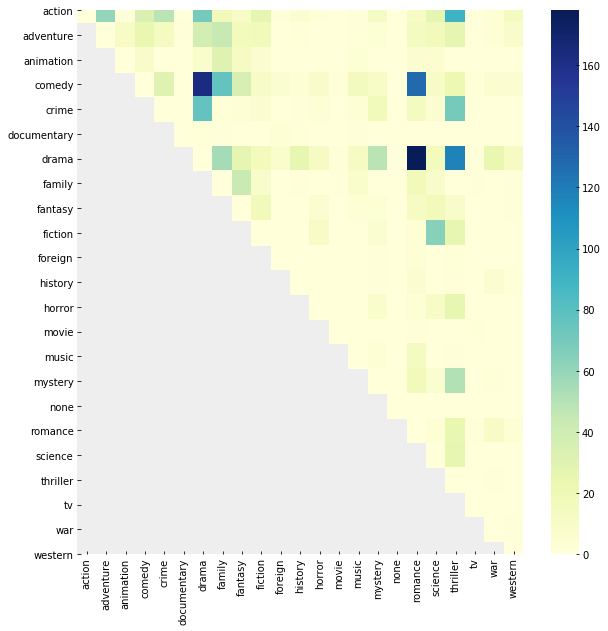

In [103]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(coocc_2,cmap="YlGnBu")

In [102]:
coocc_stack_2.sort_values('Count of Co-occurrences', ascending=False).head(10)

,Genre_1,Genre_2,Count of Co-occurrences
134,drama,romance,178
69,comedy,drama,163
80,comedy,romance,128
136,drama,thriller,118
19,action,thriller,91
70,comedy,family,77
88,crime,drama,76
101,crime,thriller,70
6,action,drama,70
180,fiction,science,64


## Appendix

In [38]:
genre_most = coocc.max(axis=0)
genre_most

action          91
adventure       60
animation       31
comedy         163
crime           76
documentary      3
drama          178
family          77
fantasy         43
fiction         64
foreign          8
history         26
horror          26
movie            2
music           15
mystery         51
none             0
romance        178
science         64
thriller       118
tv               2
war             25
western         14
dtype: int64

In [39]:
genre_most = coocc.max(axis=1)
genre_most

action          91
adventure       60
animation       31
comedy         163
crime           76
documentary      3
drama          178
family          77
fantasy         43
fiction         64
foreign          8
history         26
horror          26
movie            2
music           15
mystery         51
none             0
romance        178
science         64
thriller       118
tv               2
war             25
western         14
dtype: int64

In [40]:
coocc.stack().index[np.argmax(coocc.values)]


('drama', 'romance')

### Another Example of how to get cooccurrences - CrossTab

In [65]:
# libraries we'll need
import pandas as pd # dataframes
from io import StringIO # string to data frame
import seaborn as sns # plotting

# read in our data & convert to a data frame
data_tsv = StringIO("""city    province    position
0   Massena     NY  jr
1   Maysville   KY  pm
2   Massena     NY  m
3   Athens      OH  jr
4   Hamilton    OH  sr
5   Englewood   OH  jr
6   Saluda      SC  sr
7   Batesburg   SC  pm
8   Paragould   AR  m""")

my_data_frame = pd.read_csv(data_tsv, delimiter=r"\s+")
my_data_frame

,city,province,position
0,Massena,NY,jr
1,Maysville,KY,pm
2,Massena,NY,m
3,Athens,OH,jr
4,Hamilton,OH,sr
5,Englewood,OH,jr
6,Saluda,SC,sr
7,Batesburg,SC,pm
8,Paragould,AR,m


In [28]:
co_mat = pd.crosstab(my_data_frame.province, my_data_frame.position)
co_mat

position,jr,m,pm,sr
province,,,,
AR,0,1,0,0
KY,0,0,1,0
NY,1,1,0,0
OH,2,0,0,1
SC,0,0,1,1


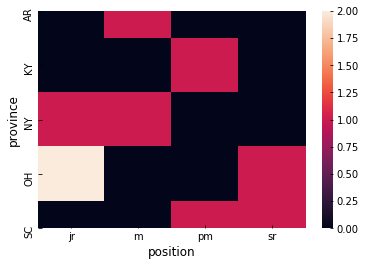

In [30]:
# plot heat map of co-occuance matrix
sns.heatmap(co_mat)

### Other trys

In [29]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd

# Create bigrams from all words in corpus
#bi_grams = list(bigrams(corpus))
bi_grams = list(bigrams(data))
print(data)
print(bi_grams)

NameError: name 'data' is not defined

In [15]:
 # Frequency distribution of bigrams ((word1, word2), num_occurrences)
bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 bigram_freq

[(('Python', 'is'), 2),
 (('Where', 'Python'), 1),
 (('is', 'used'), 1),
 (('used', 'What'), 1),
 (('What', 'is'), 1),
 (('is', 'Pythonused'), 1),
 (('Pythonused', 'in'), 1),
 (('in', 'Why'), 1),
 (('Why', 'Python'), 1),
 (('is', 'best'), 1),
 (('best', 'What'), 1),
 (('What', 'companies'), 1),
 (('companies', 'use'), 1),
 (('use', 'Python'), 1)]

In [16]:
import pandas as pd
import numpy as np
from collections import OrderedDict

# intialise sample dataframe
data = {'industry_field':['Data and Analytics, Design, Information Technology, Software',
'Data Science, Design, FinTech, Software, Data and Analytics',
'Media, Entertainment, Software, Web']} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
df

,industry_field
0,"Data and Analytics, Design, Information Techno..."
1,"Data Science, Design, FinTech, Software, Data ..."
2,"Media, Entertainment, Software, Web"


In [17]:
# dropping null value columns to avoid errors 
df.dropna(inplace = True)
df

,industry_field
0,"Data and Analytics, Design, Information Techno..."
1,"Data Science, Design, FinTech, Software, Data ..."
2,"Media, Entertainment, Software, Web"


In [18]:
# new data frame with split value columns 
df["industry_field"].str.split(",") 
df

,industry_field
0,"Data and Analytics, Design, Information Techno..."
1,"Data Science, Design, FinTech, Software, Data ..."
2,"Media, Entertainment, Software, Web"


In [19]:
df_fields = df["industry_field"]

df_fields


0    Data and Analytics, Design, Information Techno...
1    Data Science, Design, FinTech, Software, Data ...
2                  Media, Entertainment, Software, Web
Name: industry_field, dtype: object

In [20]:
# Yields a tuple of column name and series for each column in the dataframe
for (columnName, columnData) in df_fields.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData)

Colunm Name :  0
Column Contents :  Data and Analytics, Design, Information Technology, Software
Colunm Name :  1
Column Contents :  Data Science, Design, FinTech, Software, Data and Analytics
Colunm Name :  2
Column Contents :  Media, Entertainment, Software, Web


In [2]:
print('Testing github integration')

Testing github integration
